# Un aperçu sur l'utilisation de Python pour simuler des expériences de physique
**Ahmed Ammar** (email: `ahmed.ammar@fst.utm.tn`), Institut Préparatoire aux Études Scientifiques et Techniques, Université de Carthage.

Date: **Nov 24, 2020**

Copyright 2020, Ahmed Ammar. Released under CC Attribution 4.0 license

In [4]:
%config InlineBackend.figure_format = 'svg'

# Exemple de simulation numérique: l'expérience des fentes de Young 

## Réalisation de l'expèrience

![](images/alop2018.png)

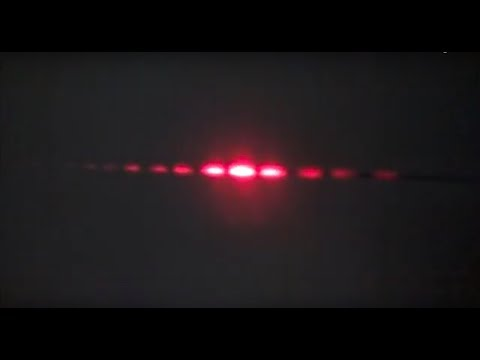

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('nuaHY5lj2AA', start=79, width=600, height=300)

### Observation
* Énumérater les pics d'interférence à l'intérieur de la tache centrale de diffraction.
* Mesurer la taille de la tache centrale de diffraction $ \Delta S $ et la taille d'une frange d'interférence $ \Delta s $.

![](images/Image1.png)

Que remarquez-vous lorsque vous modifiez la largeur et la distance entre les fentes?


### Modélisation numérique

![](images/model.png)

#### Expression analytique

\begin{equation}
	I(x) = sinc^2 (Bx)[1+cos(2Ax)] \quad avec: \ A = \pi a /\lambda D \ et \ B = \pi b / \lambda D
\end{equation}

$ b $ représente la largeur des fentes, $ a $ représente la distance entre les fentes, $ D $ est la distance de l'écran au plan des fentes et $ \lambda $ est la longueur d'onde de la lumière incidente monochromatique.

Les valeurs de $ \Delta S $ et $ \Delta s $ sont déterminées théoriquement à partir de $ b $ et $ a $:
\begin{equation}
\Delta S=2\lambda D/b	\quad et \quad \Delta s=\lambda D/a
\end{equation}

### Simulation numérique avec Python

## Exercice
Pour x un poit sur un écran (E) de largeur $L$ égale à 30 cm, calculer et tracer le profil d'intensité $I(x)$ et claculer des largeurs de la tache centrale diffraction et de l'interfrange.

## Fonction `Young()`

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def Young(a = 0.25, b = 0.15, D = 10):
    L = 30e-2   # Largeur de l'ecran (m)
    x = np.linspace(-L/2, L/2, 200) 
    Lambda = 632e-9   
    # Variables intermidières:
    A = (np.pi*a*1e-3)/(Lambda*D); B = (np.pi*b*1e-3)/(Lambda*D)
    T1 = (np.sin(B*x)/(B*x))**2   # Terme de diffraction
    T2 = 1 + np.cos(2*A*x)        # Terme d'interférence
    I = T1 * T2
    plt.figure(figsize = (4, 3))
    plt.plot(x*1e2, I/max(I), '-r',lw =2, label = "Interférence")
    plt.plot(x*1e2, T1, '--k',lw =2, label = "Diffraction")
    plt.xlabel("x (cm)")
    plt.legend()
    # Tache centrale
    DS = (2*Lambda*D)/(b*1e-3); Ds = (Lambda*D)/(a*1e-3)
    print(" Largeur de la tache centrale = {:.2f} cm".format(DS*1e2))
    print(" Largeur  de l'interfrange = {:.2f} cm".format(Ds*1e2))
    

 Largeur de la tache centrale = 8.43 cm
 Largeur  de l'interfrange = 0.84 cm


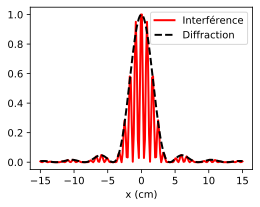

In [6]:
Young(a = 0.75, b = 0.15, D = 10)

#### Ajout de l'interactivité pour notre simulation

In [7]:
from ipywidgets import interactive, FloatSlider
from IPython.display import clear_output, display, HTML
w=interactive(Young, a = FloatSlider(min = 0.1, max = 0.8,
                                     value = 0.25,  step=0.01,
                                     description= "a(mm)"),
              b = FloatSlider(min = 0.1, max = 1,
                                     value = 0.15,  step=0.01,
                                     description= "b(mm)"),
              D = FloatSlider(min = 1,max = 20,step = 0.1, value = 15,
                  description= "D(m)"))
display(w)

interactive(children=(FloatSlider(value=0.25, description='a(mm)', max=0.8, min=0.1, step=0.01), FloatSlider(v…

#### Simulation à deux dimention: I(x, y)

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def Young2D(a = 0.25, b = 0.15, D = 10):
    L = 30e-2   # Largeur de l'ecran
    x = np.linspace(-L/2, L/2, 200) 
    y = x
    X,Y = np.meshgrid(x,y)
    Lambda = 630e-9   
    # Variables intermidières:
    A = (np.pi*a*1e-3)/(Lambda*D); B = (np.pi*b*1e-3)/(Lambda*D)
    T1 = (np.sin(B*X)/(B*X))**2   # Terme de diffraction
    T2 = 1 + np.cos(2*A*X)        # Terme d'interférence
    I = T1 * T2
    plt.figure(figsize=(5, 5))
    plt.imshow(I, cmap="gray", interpolation='bilinear',
              origin='lower',vmin=I.min(), vmax= 0.1*I.max())

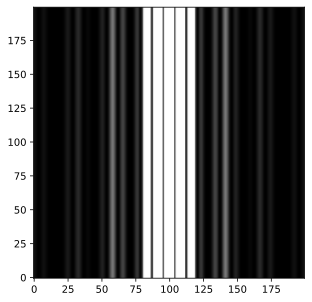

In [42]:
Young2D(a = 0.5, b = 0.15, D = 10)

In [43]:
w2=interactive(Young2D, a = FloatSlider(min = 0.1, max = 0.8,
                                     value = 0.25,  step=0.01,
                                     description= "a(mm)"),
              b = FloatSlider(min = 0.1, max = 1,
                                     value = 0.15,  step=0.01,
                                     description= "b(mm)"),
              D = FloatSlider(min = 1,max = 20,step = 0.1, value = 15,
                  description= "D(m)"))
display(w2)

interactive(children=(FloatSlider(value=0.25, description='a(mm)', max=0.8, min=0.1, step=0.01), FloatSlider(v…

# Bibliothèque scientifique python: `scipy`
`scipy` (<https://www.scipy.org/>"): `scipy` peut être considéré comme une extension de `numpy` avec un grand nombre de modules optimisés pour des calculs scientifiques spécifiques. `scipy` est la plate-forme la plus importante de Python pour le calcul scientifique. La communauté de `scipy` est un groupe bien établi et en pleine croissance de scientifiques, d’ingénieurs et de chercheurs qui utilisent, développent et promeuvent l’utilisation de Python pour le calcul scientifique, la recherche et l’éducation.

## Fonctions spéciales

Un grand nombre de fonctions mathématiques spéciales sont importantes pour de nombreux problèmes de physique informatique. SciPy fournit des implémentations d'un ensemble très complet de fonctions spéciales. Pour plus de détails, voir la liste des fonctions dans la documentation de référence à <http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special>.

### Fonctions de Bessel

Le module `scipy.special` inclut un grand nombre de fonctions de Bessel. Ici, nous allons utiliser les fonctions `jn` et `yn`, qui sont les fonctions de Bessel des premier et deuxième ordres de type et de valeurs réelles. Nous incluons également la fonction `jn_zeros` et `yn_zeros` qui donne les zéros des fonctions `jn` et `yn`.

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257
zeros of Bessel functions are:  [ 2.40482556  5.52007811  8.65372791 11.79153444]


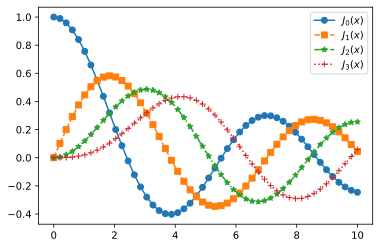

In [44]:
from scipy.special import jn, yn, jn_zeros, yn_zeros
import matplotlib.pyplot as plt
import numpy as np

n = 0    # order
x = 0.0

# Bessel function of first kind
print ("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1.0
# Bessel function of second kind
print ("Y_%d(%f) = %f" % (n, x, yn(n, x)))

# zeros of Bessel functions
n = 0 # order
m = 4 # number of roots to compute
print("zeros of Bessel functions are: ", jn_zeros(n, m))

# Plot Bessel fonctions
x = np.linspace(0, 10, 50)

markers=['o', 's', '*', '+']
lines=['-', '--', '-.', ':']

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x),ls=str(lines[n]),marker=str(markers[n]), label=r"$J_%d(x)$" % n)
ax.legend()
plt.show()

### Intégrales de Fresnel

La fonction `scipy.special.fresnel` renvoie les deux fonctions de Fresnel mais dans l'ordre (FS, FC), où FS représente l'intégrale de sinus de Fresnel et FC, l'intégrale de cosinus de Fresnel. Vous devriez faire attention à ce que vos tracés correspondent à la spirale de Cornu.

/home/ahmed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """


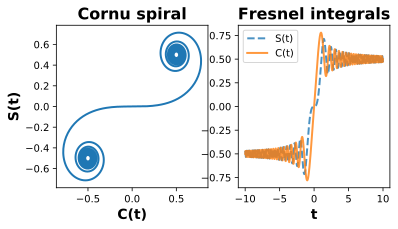

In [45]:
# -*- coding: utf-8 -*-
from scipy.special import fresnel
from scipy import linspace
import matplotlib.pyplot as plt
t = linspace(-10, 10, 1000)
FS, FC = fresnel(t)
fig1=plt.figure(figsize=(6,3))
ax1=plt.subplot(1, 2, 1)
ax1.plot(FC, FS, linewidth=2)
ax1.set_xlabel("C(t)", fontsize=14, weight='bold')
ax1.set_ylabel("S(t)", fontsize=14, weight='bold')
ax1.set_title("Cornu spiral", fontsize=16, weight='bold')

ax2=plt.subplot(1, 2, 2) 
ax2.plot(t, FS, ls='--',linewidth=2,label="S(t)", alpha=.8)
ax2.plot(t, FC,ls='-',linewidth=2,label="C(t)", alpha=.8)
ax2.set_xlabel("t", fontsize=14, weight='bold')
ax2.set_title("Fresnel integrals", fontsize=16, weight='bold')
plt.legend()
plt.show()

# Simulation de diffraction par un diaphragme circulaire
L’étude des diaphragmes circulaires est d’un intérêt pratique évident. Tout d’abord le fonctionnement de l’œil qui est composé d’un diaphragme circulaire, l’iris. De même, l’essentiel des dispositifs de capture d’images : microscopes, caméras, caméscopes, télescopes, … sont munis de diaphragmes circulaires. L’utilisation d’une lentille parfaite, c’est à dire sans aberration chromatique et géométrique, aboutirai inéluctablement à une image de diffraction similaire à celle d’un diaphragme circulaire étant donné qu’elle même est taillée avec une section circulaire. Autrement dit, l’image d’un point ne sera jamais un point. Ceci a pour conséquence de dégrader la qualité des images collectées. Le phénomène de diffraction constitue la limite ultime caractérisant la précision des appareils.


## Source ponctuelle
Les coordonnées polaires s’imposent étant donné la symétrie du problème. Soit $(r, \phi)$ ces deux coordonnées. Pour une transparence complète la transmittance est égale à 1. Autrement dit:

![](images/laser_trou.png)

![](images/coord.png)

![](images/formule1.png)

## Programmation 
Simuler la figure de diffraction pour une longueur d’onde $\lambda=632$ nm une ouverture de diamètre $r=250 \mu$m et un écran à une distance D=1m. Montrer que la taille de la tache centrale obtenue avec ces valeurs est approximativement
égale à 3,08mm.

La taille de la tache centrale est :  3.0841600000000002


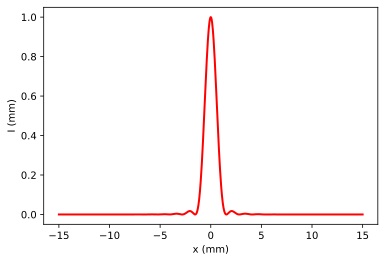

In [46]:
from numpy import pi, linspace
import scipy.special as ss
import matplotlib.pyplot as plt

lamda=632*1.E-9; k=(2.*pi)/lamda  #wavelength of light in vaccuum
a=250*1.E-6  #radius of the circular aperture (m)
f_2 = 1     # f2 is the focal length of the lens L2 (m)
e= 30 * 1.E-3  # Side of a square-shaped screen (m)
X_Mmax=e/2. ; X_Mmin = -e/2.
Y_Mmax=X_Mmax ; Y_Mmin =  X_Mmin
N =800
X=linspace(X_Mmin, X_Mmax,N); Y=X # coordinates of screen
#1D representation
q=X # intermediate variable
beta=k*a*q/f_2
dx=1.22*lamda*f_2/a*1e3
print("La taille de la tache centrale est : ", dx)
I=(2*ss.jv(1,beta)/beta)**2

plt.plot(X*1e3, I, 'r-', lw=2)
plt.xlabel("x (mm)")
plt.ylabel("I (mm)")
plt.show()

### Représentation 2 D

La taille de la tache centrale est :  3.0841600000000002


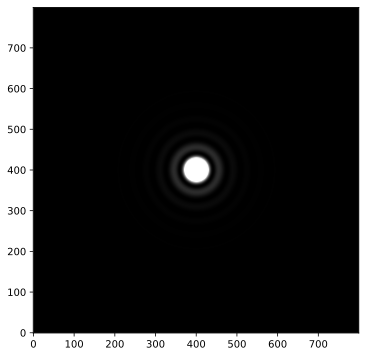

In [47]:
from numpy import pi, linspace
import scipy.special as ss
import matplotlib.pyplot as plt

lamda=632*1.E-9; k=(2.*pi)/lamda  #wavelength of light in vaccuum
a=250*1.E-6  #radius of the circular aperture (m)
f_2 = 1     # f2 is the focal length of the lens L2 (m)
e= 30 * 1.E-3  # Side of a square-shaped screen (m)
X_Mmax=e/2. ; X_Mmin = -e/2.
Y_Mmax=X_Mmax ; Y_Mmin =  X_Mmin
N =800
X=linspace(X_Mmin, X_Mmax,N); Y=X # coordinates of screen
# 2D representation
Y = X  # coordinates of screen
XX, YY = np.meshgrid(X, Y)
# 2D representation
q = (XX**2 + YY**2)**0.5  # intermediate variable
beta=k*a*q/f_2
dx=1.22*lamda*f_2/a*1e3
print("La taille de la tache centrale est : ", dx)
I=(2*ss.jv(1,beta)/beta)**2

plt.figure(figsize=(6, 6))
plt.imshow(I, cmap="gray", interpolation='bilinear',
           origin='lower',vmin=I.min(), vmax= 0.1*I.max())

# Simulation de diffraction par un bord

![](images/bord.png)


![](images/formule2.png)

## Programmation
Écrire un programme Python que a pour ojectif de reproduire la figure cui-dessous et qui représente les variations de I pour une lumière de $\lambda =592$ nm et un écran à
D=1m du bord.
![](images/bordPython.png)